# Homework 9 - Dimensionality Reduction

In machine learning, “dimensionality” simply refers to the number of features (i.e. input variables) in your dataset.
When the number of features is very large relative to the number of observations in your dataset, certain algorithms struggle to train effective models. This is called the “Curse of Dimensionality,” and it’s especially relevant for clustering algorithms that rely on distance calculations. [1]

##### Why is Dimensionality Reduction important in Machine Learning and Predictive Modeling?

An intuitive example of dimensionality reduction can be discussed through a simple e-mail classification problem, where we need to classify whether the e-mail is spam or not. This can involve a large number of features, such as whether or not the e-mail has a generic title, the content of the e-mail, whether the e-mail uses a template, etc. However, some of these features may overlap. In another condition, a classification problem that relies on both humidity and rainfall can be collapsed into just one underlying feature, since both of the aforementioned are correlated to a high degree. Hence, we can reduce the number of features in such problems. A 3-D classification problem can be hard to visualize, whereas a 2-D one can be mapped to a simple 2 dimensional space, and a 1-D problem to a simple line. The below figure illustrates this concept, where a 3-D feature space is split into two 1-D feature spaces, and later, if found to be correlated, the number of features can be reduced even further.[2]

<img src="Dimensionality_Reduction_1.jpg">[2]

###### Components of Dimensionality Reduction

There are two components of dimensionality reduction:

1. Feature selection: In this, we try to find a subset of the original set of variables, or features, to get a smaller subset which can be used to model the problem. It usually involves three ways:
    a. Filter
    b. Wrapper
    c. Embedded
2. Feature extraction: This reduces the data in a high dimensional space to a lower dimension space, i.e. a space with lesser no. of dimensions.

##### Methods of Dimensionality Reduction

The various methods used for dimensionality reduction include:

1. Principal Component Analysis (PCA)
2. Linear Discriminant Analysis (LDA)
3. Generalized Discriminant Analysis (GDA)

Dimensionality reduction may be both linear or non-linear, depending upon the method used. The prime linear method, called Principal Component Analysis, or PCA, is discussed below.

##### Principal Component Analysis

This method was introduced by Karl Pearson. It works on a condition that while the data in a higher dimensional space is mapped to data in a lower dimension space, the variance of the data in the lower dimensional space should be maximum.[2]

#### REFERENCES:
[1] Elite Data Science, "Dimensionality Reduction Algorithms". URL - https://elitedatascience.com/dimensionality-reduction-algorithms
[2] Geek for Geeks, "Dimensionality Reduction". URL - https://www.geeksforgeeks.org/dimensionality-reduction/

## Data Setup

Loading the file.
File Obtained from http://www.who.int/tb/country/data/download/en/

In [70]:
local_tb_existing_file = 'burden_estimates.csv'

Reading csv file with 'country' column as index.

In [71]:
import pandas as pd
    
existing_df = pd.read_csv(
    local_tb_existing_file, 
    index_col = 0)
existing_df.index.names = ['country']
existing_df.columns.names = ['variables']

In [72]:
existing_df.head()

variables,iso2,iso3,iso_numeric,year,source_rr_new,source_drs_coverage_new,source_drs_year_new,e_rr_pct_new,e_rr_pct_new_lo,e_rr_pct_new_hi,...,e_rr_pct_ret_lo,e_rr_pct_ret_hi,e_mdr_pct_rr_ret,e_inc_rr_num,e_inc_rr_num_lo,e_inc_rr_num_hi,e_mdr_pct_rr,e_rr_in_notified_pulm,e_rr_in_notified_pulm_lo,e_rr_in_notified_pulm_hi
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,AF,AFG,4,2017,Model,NaN,2017,3.7,2.00,5.9,...,15.00,27.0,84,3200,1500,5500,79.0,1700.0,1000.0,2300.0
Albania,AL,ALB,8,2017,Surveillance,National,2012,2.3,0.64,5.8,...,0.17,32.0,86,17,5,36,99.0,9.0,1.0,17.0
Algeria,DZ,DZA,12,2017,Model,NaN,2017,2.5,1.10,4.3,...,10.00,18.0,79,780,350,1400,67.0,240.0,120.0,360.0
American Samoa,AS,ASM,16,2017,Model,NaN,2017,2.3,0.86,4.4,...,7.20,19.0,88,0,0,0,79.0,0.0,0.0,0.0
Andorra,AD,AND,20,2017,Surveillance,National,2017,0.0,0.00,98.0,...,8.00,17.0,86,0,0,0,86.0,0.0,0.0,1.0


For the purpose of PCA, we will only be keeping columns with float type values - hence, removing columns that do not have float type values.

In [75]:
import numpy as np
# check type of each column
df = existing_df
df.dtypes
# columns that are floats
msk = df.dtypes == np.float64
# keep those that are floats
active_df = df.loc[:, msk]
active_df.head(5)

variables,e_rr_pct_new,e_rr_pct_new_lo,e_rr_pct_new_hi,e_rr_pct_ret,e_rr_pct_ret_lo,e_rr_pct_ret_hi,e_mdr_pct_rr,e_rr_in_notified_pulm,e_rr_in_notified_pulm_lo,e_rr_in_notified_pulm_hi
country,,,,,,,,,,
Afghanistan,3.7,2.00,5.9,21.0,15.00,27.0,79.0,1700.0,1000.0,2300.0
Albania,2.3,0.64,5.8,6.7,0.17,32.0,99.0,9.0,1.0,17.0
Algeria,2.5,1.10,4.3,14.0,10.00,18.0,67.0,240.0,120.0,360.0
American Samoa,2.3,0.86,4.4,12.0,7.20,19.0,79.0,0.0,0.0,0.0
Andorra,0.0,0.00,98.0,12.0,8.00,17.0,86.0,0.0,0.0,1.0


We also need to avoid NaN values from the dataframe. So removing columns with NaN values.

In [126]:
active_df = active_df.dropna()
active_df.head()

variables,e_rr_pct_new,e_rr_pct_new_lo,e_rr_pct_new_hi,e_rr_pct_ret,e_rr_pct_ret_lo,e_rr_pct_ret_hi,e_mdr_pct_rr,e_rr_in_notified_pulm,e_rr_in_notified_pulm_lo,e_rr_in_notified_pulm_hi
country,,,,,,,,,,
Afghanistan,3.7,2.00,5.9,21.0,15.00,27.0,79.0,1700.0,1000.0,2300.0
Albania,2.3,0.64,5.8,6.7,0.17,32.0,99.0,9.0,1.0,17.0
Algeria,2.5,1.10,4.3,14.0,10.00,18.0,67.0,240.0,120.0,360.0
American Samoa,2.3,0.86,4.4,12.0,7.20,19.0,79.0,0.0,0.0,0.0
Andorra,0.0,0.00,98.0,12.0,8.00,17.0,86.0,0.0,0.0,1.0


## Implementing PCA on the Dataset

Following the tutorial at: https://www.codementor.io/jadianes/data-science-python-pandas-r-dimensionality-reduction-du1081aka

##### pip install sklean

In [83]:
from sklearn.decomposition import PCA
    
pca = PCA(n_components=2)
pca.fit(active_df)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [85]:
data_2d = pca.transform(active_df)

Creating a new dataframe with country as index, and the two principal components as the two columns.

In [88]:
data_2d = pd.DataFrame(data_2d)
data_2d.index = active_df.index
data_2d.columns = ['PC1','PC2']
data_2d.head()

,PC1,PC2
country,,
Afghanistan,-19.048485,-496.581607
Albania,-2976.277667,72.655846
Algeria,-2560.477396,-38.060438
American Samoa,-2993.073120,82.059865
Andorra,-2992.415921,81.715156


#####  Variances of PC1, PC2

In [89]:
print(pca.explained_variance_ratio_) 

[0.995717   0.00427129]


We see that the first PC already explains almost 99.6% of the variance, while the second one accounts for another 0.4% between the two of them. So the most varience will occur on the y axis Let's visualize it the graph below

In [127]:
#rounding up values to 2 decimal points for graph
for index, row in data_2d.iterrows():
    row['PC1'] = round(row['PC1'],2)
    row['PC2'] = round(row['PC2'],2)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 1: ordinal not in range(128)

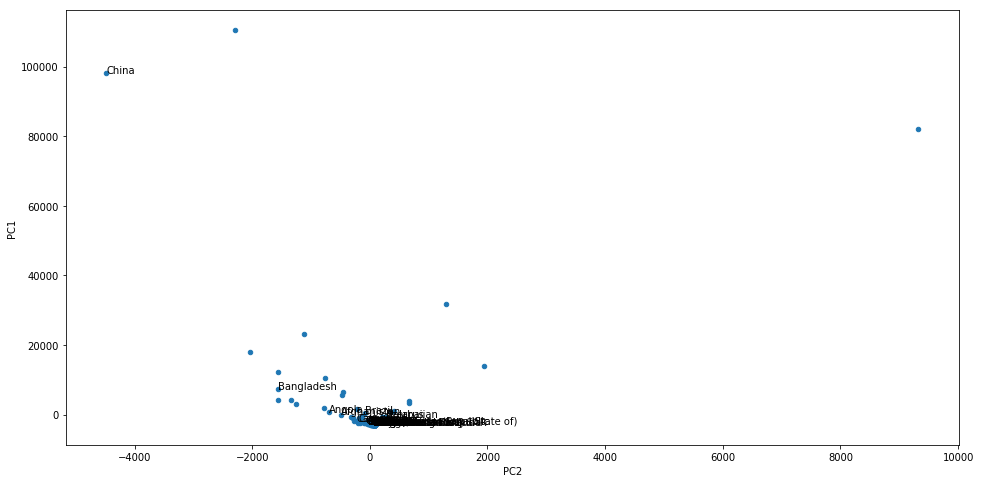

In [103]:
ax = data_2d.plot(kind='scatter', x='PC2', y='PC1', figsize=(16,8))
    
for i, country in enumerate(active_df.index):
    ax.annotate(
        country.encode('utf-8'), (data_2d.iloc[i].PC2, data_2d.iloc[i].PC1)
    )

#### Normalize Data

##### Mean

In [104]:
from sklearn.preprocessing import normalize
    
data_2d['country_mean'] = pd.Series(active_df.mean(axis=1), index=data_2d.index)
country_mean_max = data_2d['country_mean'].max()
country_mean_min = data_2d['country_mean'].min()
country_mean_scaled = (data_2d.country_mean-country_mean_min) / country_mean_max
data_2d['country_mean_scaled'] = pd.Series(country_mean_scaled, index=data_2d.index) 
data_2d.head()

,PC1,PC2,country_mean,country_mean_scaled
country,,,,
Afghanistan,-19.05,-496.58,515.360,0.025916
Albania,-2976.28,72.66,17.361,0.000395
Algeria,-2560.48,-38.06,83.690,0.003794
American Samoa,-2993.07,82.06,12.476,0.000145
Andorra,-2992.42,81.72,22.200,0.000643


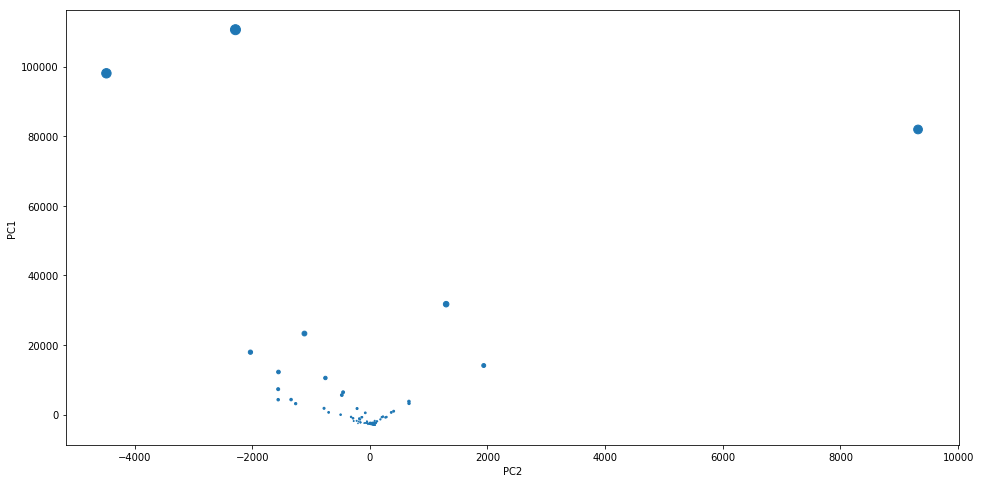

In [107]:
data_2d.plot(
    kind='scatter', 
    x='PC2', 
    y='PC1', 
    s=data_2d['country_mean_scaled']*100, 
    figsize=(16,8))

##### Sum

In [119]:
data_2d['country_sum'] = pd.Series(active_df.sum(axis=1), index=data_2d.index)
country_sum_max = data_2d['country_sum'].max()
country_sum_min = data_2d['country_sum'].min()
country_sum_scaled = (data_2d.country_sum-country_sum_min) / country_sum_max
data_2d['country_sum_scaled'] = pd.Series(country_sum_scaled, index=data_2d.index)
data_2d.head()

,PC1,PC2,country_mean,country_mean_scaled,country_sum,country_sum_scaled
country,,,,,,
Afghanistan,-19.05,-496.58,515.360,0.025916,5153.60,0.025916
Albania,-2976.28,72.66,17.361,0.000395,173.61,0.000395
Algeria,-2560.48,-38.06,83.690,0.003794,836.90,0.003794
American Samoa,-2993.07,82.06,12.476,0.000145,124.76,0.000145
Andorra,-2992.42,81.72,22.200,0.000643,222.00,0.000643


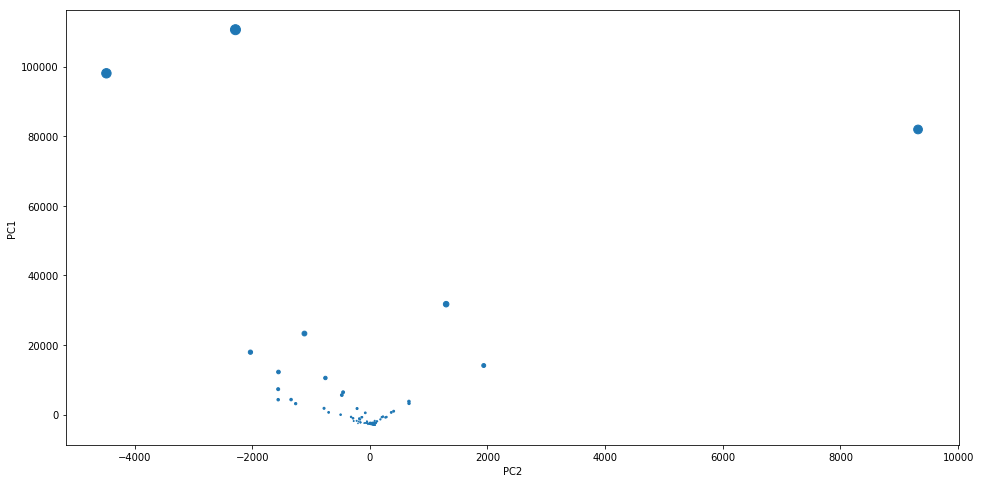

In [121]:
data_2d.plot(kind='scatter', x='PC2', y='PC1', s=data_2d['country_sum_scaled']*100, figsize=(16,8))

### What can we learn from the above graphs?

From the above plots of the pca results and on the normalized data, we can confirm that the most variation happens along the y axis, which we have assigned to PC1. We saw that the first PC already explains almost 99.6% of the variance, while the second one accounts for another 0.4% between the two of them. The countries are spread in the graph but there is a concentration at the bottom center. Performing a clustering algorithm on our findings can further categorize the countries and group them in clusters. So performing K-Means Clustering.

## K-Means Clustering

Using sklearn's K-Means Clustering Implementation

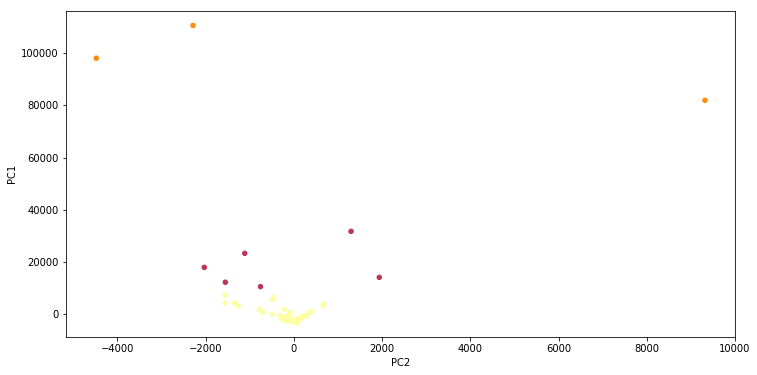

In [122]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from itertools import cycle, islice
from matplotlib import cm


#set the number of clusters: 3
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit(active_df)
data_2d['cluster'] = pd.Series(clusters.labels_, index=data_2d.index)
color = cm.inferno_r(data_2d.cluster.astype(np.float)/4)

data_2d.plot(kind='scatter',x='PC2',y='PC1',c=color, figsize=(12,6))

The above graph shows 3 clusters.

Cluster Top - Orange
Cluster Center - Maroon
Cluster Bottom - Yellow

Let us see which countries belong to which clusters.

In [125]:
labels = kmeans.predict(active_df)
clusters = {}
n = 0

# associate each state to a cluster
for item in labels:
    if item in clusters:
        clusters[item].append(active_df.index[n])
    else:
        clusters[item] = [active_df.index[n]]
    n +=1

# print the cluster
for item in clusters:
    print "Cluster ", item
    for i in clusters[item]:
        print i
    print

Cluster  0
Afghanistan
Albania
Algeria
American Samoa
Andorra
Angola
Antigua and Barbuda
Argentina
Armenia
Aruba
Australia
Austria
Azerbaijan
Bahamas
Bahrain
Bangladesh
Belarus
Belgium
Belize
Benin
Bermuda
Bhutan
Bolivia (Plurinational State of)
Botswana
Brazil
Bulgaria
Burkina Faso
Burundi
Cabo Verde
Cambodia
Cameroon
Cayman Islands
Central African Republic
Chad
Chile
China, Hong Kong SAR
China, Macao SAR
Colombia
Congo
Costa Rica
Côte d'Ivoire
Cuba
Curaçao
Cyprus
Czechia
Democratic People's Republic of Korea
Democratic Republic of the Congo
Denmark
Djibouti
Dominica
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Eritrea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
French Polynesia
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Greenland
Grenada
Guam
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iran (Islamic Republic of)
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kiribati
Kuwait
Kyrgyzstan
Lao People's Democratic Republic
Latvia
Lebanon

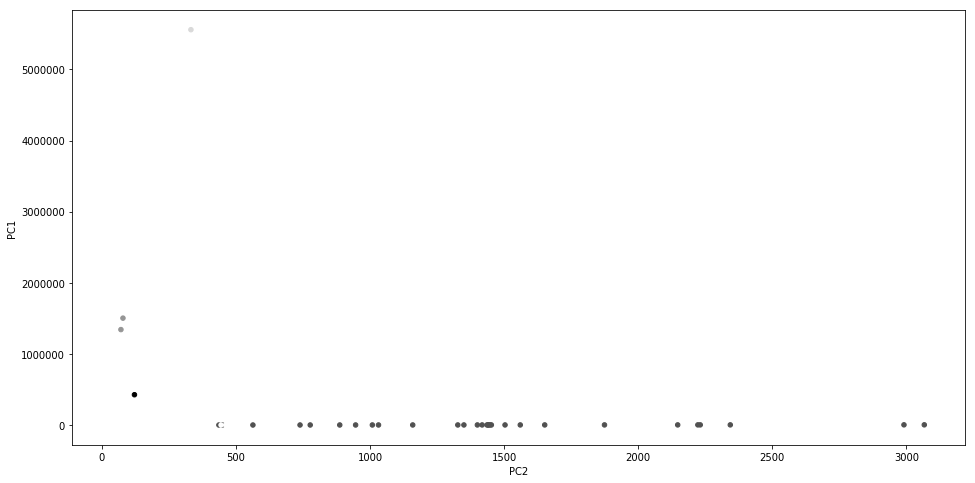